In [106]:
import pandas as pd
import numpy as np
import gensim
from sklearn.metrics.pairwise import euclidean_distances, cosine_similarity
from sklearn.decomposition import PCA
import matplotlib as mpl
import matplotlib.pyplot as plt


In [112]:
emb = gensim.models.doc2vec.Doc2Vec.load('../models/party_lvl-dm-m-d20-n5-w10-mc5-s0.001-t8.mdl')
emb_rp = gensim.models.doc2vec.Doc2Vec.load('../models/party_lvl-dm-m-d20-n5-w10-mc5-s0.001-t8-e10-bigrams-2tags-2-reduced-parties.mdl')
#emb2 = gensim.models.doc2vec.Doc2Vec.load('../models/party_lvl-dm-m-d20-n5-w10-mc5-s0.001-t8-e10-bigrams-2tags-pp-psoe-only.mdl')
#emb2 = gensim.models.doc2vec.Doc2Vec.load('../models/party_lvl-dm-m-d300-n5-w20-mc5-s1e-6-t8-e100-bigrams-2tags-pp-psoe-only.mdl')


In [116]:
reduced

,dim0,dim1,speaker,col
0,26.220567,-8.476598,UP-7,#a245b2
1,3.323183,-7.855511,L7,#000000
2,2.716811,-10.910106,PSOE-7,#c10200
3,-26.171275,10.544369,PP-7,#1eb3e6
4,-24.477548,-4.589748,PP-8,#1eb3e6
5,3.673492,-7.167747,L8,#000000
6,-9.707251,11.320552,PSOE-8,#c10200
7,32.069706,-8.436631,UP-8,#a245b2
8,0.503946,12.678763,PSOE-9,#c10200
9,-6.497681,6.316408,L9,#000000


In [234]:
dr.explained_variance_ratio_

# Try T-SNE.

array([0.31181511, 0.20132124])

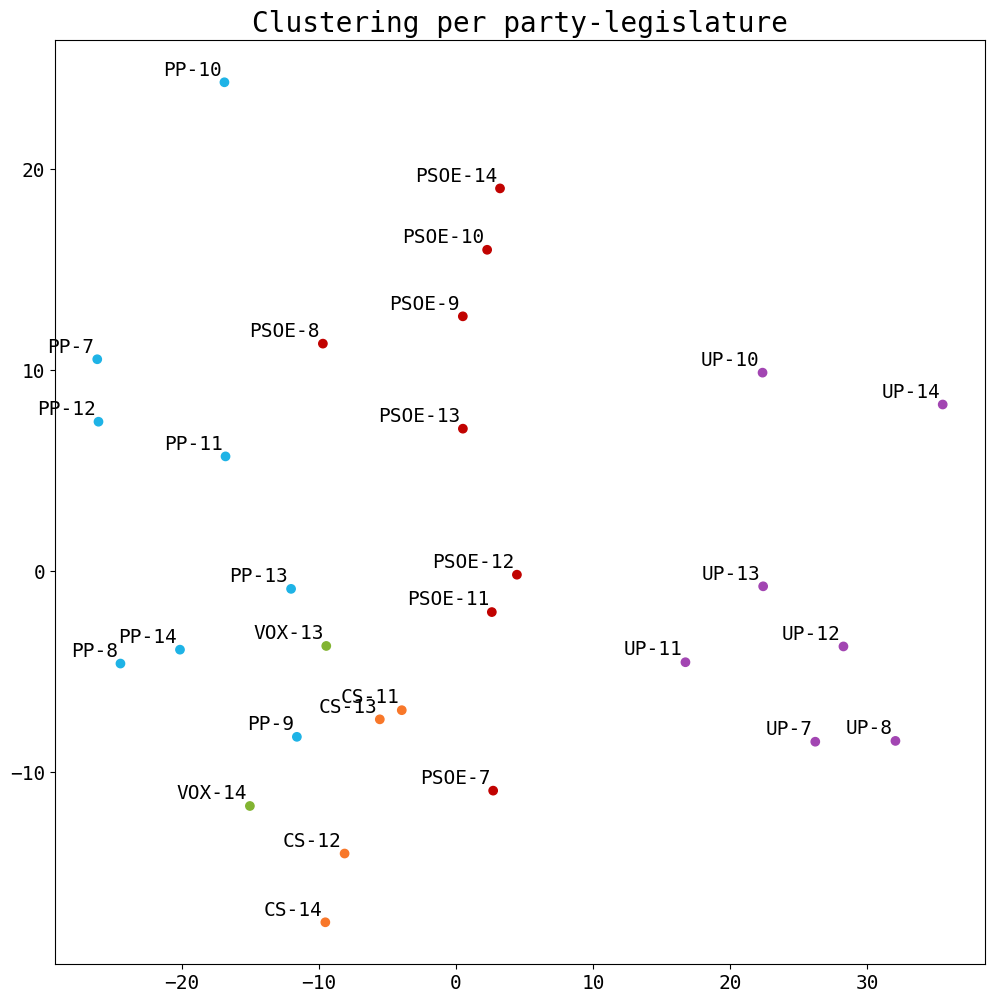

In [170]:
def reduce_dimension(model, n=2):
    speakers = [item for item in model.dv.index_to_key] #if '-' in item]
    S = len(speakers)
    M = model.vector_size
    z = np.zeros((S, M))

    for i in range(S):
        z[i, :] = model.dv[i]

    dr = PCA(n_components=n)
    Z = dr.fit_transform(z)

    Z = pd.DataFrame(Z)

    columns = []
    for i in range(n):
        columns.append(f'dim{i}')
    Z.columns = columns

    Z['speaker'] = speakers

    return Z, dr

def get_color(reduced):
    spk = reduced.speaker.tolist()
    col = []
    for i in range(len(spk)):
        if 'VOX' in spk[i]:
            # #82b431
            # rgba(130,180,49,255)
            col.append('#82b431')
        elif 'PSOE' in spk[i]:
            # #c10200
            # rgba(193,2,0,255)
            col.append('#c10200')
        elif 'IU' in spk[i]:
            # #c10200
            # rgba(193,2,0,255)
            col.append('#8b0000')
        elif 'CS' in spk[i]:
            # #f87729
            # rgba(248,119,41,255)
            col.append('#f87729')
        elif 'PP' in spk[i]:
            # #1eb3e6
            # rgba(30,179,230,255)
            col.append('#1eb3e6')
        elif 'UP' in spk[i]:
            # #a245b2
            # rgba(162,69,178,255)
            col.append('#a245b2')
        elif 'ERC' in spk[i]:
            # #f99f00
            # rgba(249,159,0,255)
            col.append('#f99f00')
        elif 'PNV' in spk[i]:
            # #008146
            # rgba(0,129,70,255)
            col.append('#008146')
        elif 'EHB' in spk[i]:
            # #bbce00
            # rgba(187,206,0,255)
            col.append('#bbce00')
        else:
            col.append('#000000')

    reduced['col'] = col
    return reduced

def plot(reduced):
    mpl.rcParams['axes.titlesize'] = 20
    mpl.rcParams['axes.labelsize'] = 20
    mpl.rcParams['font.size'] = 14
    mpl.rcParams['font.family'] = 'monospace'

    # Select only parties:
    rp = reduced.loc[reduced['speaker'].str.contains('-')]

    plt.figure(figsize=(12, 12))
    plt.scatter(rp.dim0, rp.dim1, c=rp.col)

    for label, x, y in zip(rp.speaker, rp.dim0, rp.dim1):
        plt.annotate(
            label,
            xy=(x, y), xytext=(-2, 2),
            textcoords='offset points', ha='right', va='bottom')

    plt.title(
        'Clustering per party-legislature')
    plt.show()

Z, dr = reduce_dimension(emb_rp)
reduced = get_color(Z)
plot(reduced)

In [166]:
def interpret(emb, pca, N, min_count, max_count, topn) -> list:
    
    # List all the tokens sorted by ocurrence in the corpus.
    words = emb.wv.index_to_key

    max = reduced.max()
    min = reduced.min()

    wl = []
    for w in words:
        wl.append((w, emb.wv.get_vecattr(w, 'count')))
    
    selected_wl = [word for word, c in wl if c > min_count and c < max_count]

    if len(selected_wl) < N:
        N = len(selected_wl)
        print(f'Size of selected_wl is smaller than N. N is now = {N}')

    selected_wl = selected_wl[0:N]

    # Reduce the vectors for each selected word using the PCA model to a 2D vector.
    M = np.zeros((N, 2))
    for i, w in enumerate(selected_wl):
        M[i, :] = pca.transform(emb.wv[w].reshape(1, -1))


    # Compute euclidean distances to each corner of the reduced embedding space.
    right = euclidean_distances(M, np.array([max[0], 0]).reshape(1, -1))
    left = euclidean_distances(M, np.array([min[0], 0]).reshape(1, -1))
    up = euclidean_distances(M, np.array([0, max[1]]).reshape(1, -1))
    down = euclidean_distances(M, np.array([0, min[1]]).reshape(1, -1))

    similarities = pd.DataFrame({
        'word': selected_wl,
        'right': right[:, 0],
        'left': left[:, 0],
        'up': up[:, 0],
        'down': down[:, 0]})

    print('Words associated with possitive values of the first PCA component (right):')
    print(80*'-')
    print(similarities.sort_values(by='right')['word'].tolist()[0:topn])

    print('Words associated with negative values of the first PCA component (left):')
    print(80*'-')
    print(similarities.sort_values(by='left')['word'].tolist()[0:topn])

    print('Words associated with possitive values of the second PCA component (up):')
    print(80*'-')
    print(similarities.sort_values(by='up')['word'].tolist()[0:topn])

    print('Words associated with negative values of the second PCA component (down):')
    print(80*'-')
    print(similarities.sort_values(by='down')['word'].tolist()[0:topn])

    return M, selected_wl

m, wl = interpret(emb_rp, dr, 10000, 200, 10000, 50)

Words associated with possitive values of the first PCA component (right):
--------------------------------------------------------------------------------
['trabajadores_trabajadoras', 'movimiento_feminista', 'ciudadanía', 'derechos_laborales', 'privatización', 'recortes', 'derechas', 'montoro', 'derecha', 'recorte', 'organizaciones_sociales', 'sanidad_pública', 'grandes_empresas', 'gente', 'movilizaciones', 'planteamos', 'trabajadoras', 'poderosos', 'especulación', 'empresas_privadas', 'privatizaciones', 'precariedad', 'ultraderecha', 'servicios_públicos', 'salario_mínimo', 'derechos_humanos', 'entendiendo', 'ciudadanas', 'pública', 'desahucios', 'feminista', 'salarios', 'sindical', 'planteábamos', 'franquismo', 'privatizar', 'cuidados', 'corrupción', 'recortado', 'sindicatos', 'condiciones_laborales', 'represión', 'feministas', 'paraísos_fiscales', 'pobreza_energética', 'recortar', 'derechos_sociales', 'ayuso', 'eléctricas', 'norteamericano']
Words associated with negative values of

In [238]:
def reference_concepts(emb, pca):
    
    concepts = ['subida_impuestos', 'equilibrio_presupuestario', 'despilfarro', 'progresista',
    'derechos_sociales', 'emergencia_climática','cambio_climático', 'ideología_género', 'feminismo',
    'feminista', 'movimiento_feminista', 'transgénero', 'extrema_derecha', 'derechas', 'equiparación_salarial', 'servicios_públicos',
    'derechos_laborales', 'privatización', 'sanidad_pública', 'grandes_empresas', 'especulación', 'privatizaciones', 'precario', 'precariedad', 
    'salario_mínimo', 'derechos_humanos', 'desahucios', 'okupa', 'okupaciones', 'sindicatos', 'sindical', 'huelga', 'franquismo', 'cuidar', 'cuidados', 'condiciones_laborales',
    'represión', 'feministas', 'paraísos_fiscales', 'pobreza', 'exclusión_social', 'pobreza_energética', 'eta','víctimas_terrorismo', 'concordia', 'nación_española','ejército_tierra',
    'asesinos', 'padres', 'terroristas', 'terrorista', 'socialcomunista', 'socialcomunismo', 'filoetarra', 'fascista', 'fascistas', 'comunistas', 'comunismo', 'miseria',
    'otegi', 'etarras', 'eta', 'etarra', 'juego', 'adicción_juego', 'apuestas', 'lomloe', 'lomce', 'populista', 'populismo', 'populistas', 'pueblo_gitano',
    'planes_igualdad','igualdad', 'mordaza', 'presos', 'mascarillas', 'covid', 'pymes', 'autónomos', 'seguridad_social', 'subida_pensiones', 'golpista', 'golpistas',
    'interrupción_voluntaria_embarazo', 'aborto', 'opresión', 'madruga', 'izquierda', 'izquierda_radical', 'españa', 'venezuela', 'cuba', 'coronavirus', 'aislamiento', 'pandemia']

    M = np.zeros((len(concepts), 2))

    for i, w in enumerate(concepts):
        M[i, :] = pca.transform(emb.wv[w].reshape(1, -1))

    words = pd.DataFrame({'word': concepts})
    words['x'] = M[:, 0]
    words['y'] = M[:, 1]

    return words
    
words = reference_concepts(emb_rp, dr)
words


,word,x,y
0,subida_impuestos,-9.454802,-1.681642
1,equilibrio_presupuestario,-5.612461,5.604890
2,despilfarro,-3.735760,0.542171
3,progresista,3.909796,1.709110
4,derechos_sociales,6.216521,1.790827
...,...,...,...
91,venezuela,-4.452537,-0.993223
92,cuba,-2.240365,2.431364
93,coronavirus,-3.128281,-2.712768
94,aislamiento,0.639708,3.236586


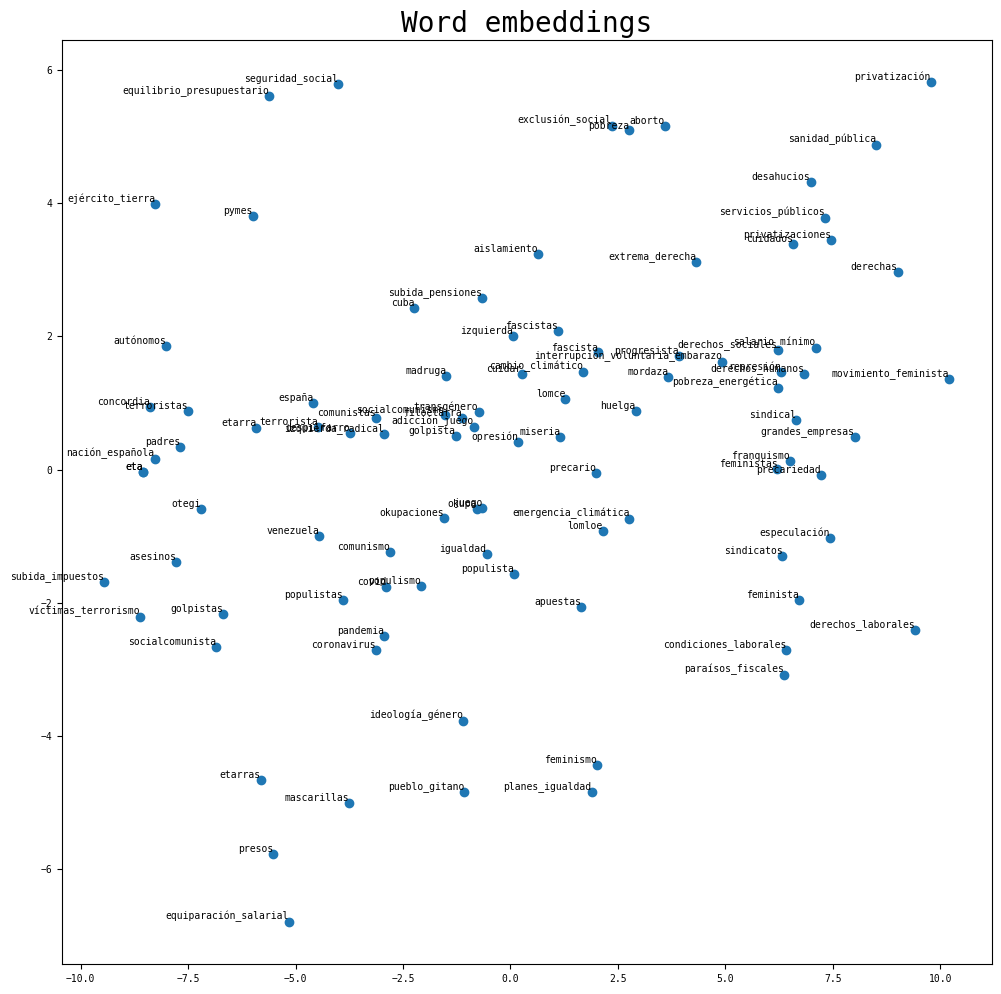

In [239]:
def plot_w(w):
    mpl.rcParams['axes.titlesize'] = 20
    mpl.rcParams['axes.labelsize'] = 20
    mpl.rcParams['font.size'] = 7
    mpl.rcParams['font.family'] = 'monospace'

    plt.figure(figsize=(12, 12))
    plt.scatter(w.x, w.y)

    for label, x, y in zip(w.word, w.x, w.y):
        plt.annotate(
            label,
            xy=(x, y), xytext=(0, 0),
            textcoords='offset points', ha='right', va='bottom')

    plt.title(
        'Word embeddings')
    plt.show()

plot_w(words)

In [240]:
#emb_rp.infer_vector(['derechos_sociales'])
#emb_rp.infer_vector(['cambio_climático', 'emergencia_climática', 'biodiversidad'])

dr.transform(emb_rp.wv['transgénero'].reshape(1, -1))


array([[-0.74363585,  0.87071826]])

In [244]:
#s = ['empresas', 'libertad', 'beneficios', 'privado']
s = ['terrorista']
infer_vector = emb_rp.infer_vector(s)
similar_documents = emb_rp.dv.most_similar([infer_vector], topn=10)

In [245]:
emb_rp.wv.similar_by_vector(emb_rp.dv['UP-14'], topn=100, restrict_vocab=20000)

[('derechas', 0.5899378061294556),
 ('derecha', 0.575505793094635),
 ('trabajadores_trabajadoras', 0.5521754622459412),
 ('ciudadanía', 0.5265786647796631),
 ('movimiento_feminista', 0.5107583403587341),
 ('unidas', 0.5051700472831726),
 ('segundo_elemento', 0.49117571115493774),
 ('ultraderecha', 0.4893980026245117),
 ('entendiendo', 0.4848441183567047),
 ('gente', 0.4700266122817993),
 ('allá', 0.4528137445449829),
 ('gente_trabajadora', 0.4451737403869629),
 ('públicas', 0.4411065876483917),
 ('trabajadoras', 0.4379153847694397),
 ('tercer_elemento', 0.43324360251426697),
 ('grandes_empresas', 0.41880863904953003),
 ('blindar', 0.41151073575019836),
 ('cambio_paradigma', 0.41095879673957825),
 ('clase_trabajadora', 0.40873104333877563),
 ('derechos', 0.4082631766796112),
 ('acabar', 0.4082582890987396),
 ('claramente', 0.4057692289352417),
 ('raíz', 0.4047442078590393),
 ('feministas', 0.4037207365036011),
 ('económica_fiscal_udef', 0.3995455801486969),
 ('especuladores', 0.39858815

In [101]:
emb2.wv.most_similar(positive=['rey'], topn=20)

[('majestad_rey', 0.8064596056938171),
 ('majestad', 0.7437318563461304),
 ('corona', 0.7019537091255188),
 ('golpista', 0.6845688819885254),
 ('umd', 0.6817938089370728),
 ('tarradellas', 0.6793130040168762),
 ('casa_majestad_rey', 0.6789883971214294),
 ('sueldo_rey', 0.6753228902816772),
 ('hitler', 0.6724854111671448),
 ('salón', 0.6663691401481628),
 ('monarquía', 0.664530873298645),
 ('juramento', 0.6631643772125244),
 ('repúblicas', 0.6579472422599792),
 ('tito', 0.6465358734130859),
 ('republicana', 0.6429462432861328),
 ('cantidad_global_sostenimiento', 0.6428518295288086),
 ('jordi_solé_tura', 0.6411094665527344),
 ('gracia_dios', 0.6349351406097412),
 ('marqués', 0.6346961855888367),
 ('picasso', 0.6301681995391846)]